In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

In [2]:
df = pd.read_csv("ecommerce_customer_behavior_dataset.csv")

# Shape
print("Dataset Shape:", df.shape)

Dataset Shape: (2500, 12)


In [3]:
df.head()


,customer_id,age,gender,city,annual_income,spending_score,membership_years,total_orders,avg_order_value,last_purchase_days,preferred_category,churn
2495,2496,18,Female,San Francisco,123801.0,86.0,6,36,183,64,Groceries,0
2496,2497,61,Female,San Francisco,101515.0,81.0,5,17,431,290,Fashion,0
2497,2498,62,Female,San Francisco,97065.0,100.0,10,28,419,18,Groceries,0
2498,2499,59,Female,Miami,75390.0,17.0,4,28,35,64,Sports,0
2499,2500,64,Female,Dallas,36645.0,14.0,1,22,37,362,Fashion,1


In [5]:

df.head()

,customer_id,age,gender,city,annual_income,spending_score,membership_years,total_orders,avg_order_value,last_purchase_days,preferred_category,churn
0,1,56,Male,Chicago,85780.0,57.0,3,16,121,136,Fashion,0
1,2,69,Male,Phoenix,135614.0,1.0,9,29,282,247,Groceries,1
2,3,46,Male,Chicago,23178.0,71.0,5,23,290,248,Home,0
3,4,32,Female,Phoenix,51831.0,58.0,5,24,243,331,Sports,1
4,5,60,Female,Los Angeles,22176.0,91.0,4,34,158,198,Electronics,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         2500 non-null   int64  
 1   age                 2500 non-null   int64  
 2   gender              2500 non-null   object 
 3   city                2500 non-null   object 
 4   annual_income       2425 non-null   float64
 5   spending_score      2425 non-null   float64
 6   membership_years    2500 non-null   int64  
 7   total_orders        2500 non-null   int64  
 8   avg_order_value     2500 non-null   int64  
 9   last_purchase_days  2500 non-null   int64  
 10  preferred_category  2500 non-null   object 
 11  churn               2500 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 234.5+ KB


In [7]:
df.describe()


,customer_id,age,annual_income,spending_score,membership_years,total_orders,avg_order_value,last_purchase_days,churn
count,2500.00000,2500.000000,2425.000000,2425.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1250.50000,43.734800,84078.068866,50.372784,5.560000,29.918800,258.406000,182.326000,0.260400
std,721.83216,14.967715,37892.851834,28.708468,2.903407,17.047171,137.581428,105.305895,0.438941
min,1.00000,18.000000,20060.000000,1.000000,1.000000,1.000000,20.000000,1.000000,0.000000
25%,625.75000,31.000000,50232.000000,25.000000,3.000000,15.000000,139.000000,91.000000,0.000000
50%,1250.50000,44.000000,84926.000000,51.000000,6.000000,29.000000,263.000000,182.000000,0.000000
75%,1875.25000,56.000000,117628.000000,75.000000,8.000000,45.000000,374.000000,274.000000,1.000000
max,2500.00000,69.000000,149949.000000,100.000000,10.000000,59.000000,499.000000,364.000000,1.000000


In [8]:
df.skew(numeric_only=True)


customer_id           0.000000
age                  -0.033701
annual_income        -0.015752
spending_score       -0.002007
membership_years     -0.025852
total_orders          0.011184
avg_order_value      -0.016354
last_purchase_days   -0.010585
churn                 1.092593
dtype: float64

In [9]:
df.nunique()


customer_id           2500
age                     52
gender                   2
city                     8
annual_income         2406
spending_score         100
membership_years        10
total_orders            59
avg_order_value        477
last_purchase_days     364
preferred_category       6
churn                    2
dtype: int64

In [10]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: Index(['customer_id', 'age', 'annual_income', 'spending_score',
       'membership_years', 'total_orders', 'avg_order_value',
       'last_purchase_days', 'churn'],
      dtype='object')
Categorical Columns: Index(['gender', 'city', 'preferred_category'], dtype='object')


In [11]:
df.isnull().sum()


customer_id            0
age                    0
gender                 0
city                   0
annual_income         75
spending_score        75
membership_years       0
total_orders           0
avg_order_value        0
last_purchase_days     0
preferred_category     0
churn                  0
dtype: int64

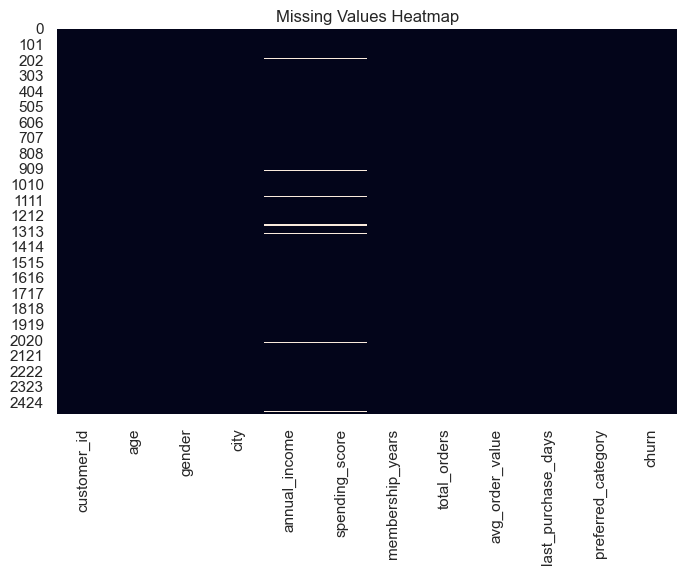

In [12]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [13]:
# Handle Missing
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [14]:
print("Duplicate Rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Rename Columns (Standard Format)
df.columns = df.columns.str.lower().str.replace(" ", "_")

Duplicate Rows: 0


In [15]:
df["age_group"] = pd.cut(df["age"],
                         bins=[18,25,35,45,60,80],
                         labels=["18-25","26-35","36-45","46-60","60+"])

df["age_group"].value_counts()

age_group
46-60    730
36-45    480
26-35    458
60+      449
18-25    333
Name: count, dtype: int64

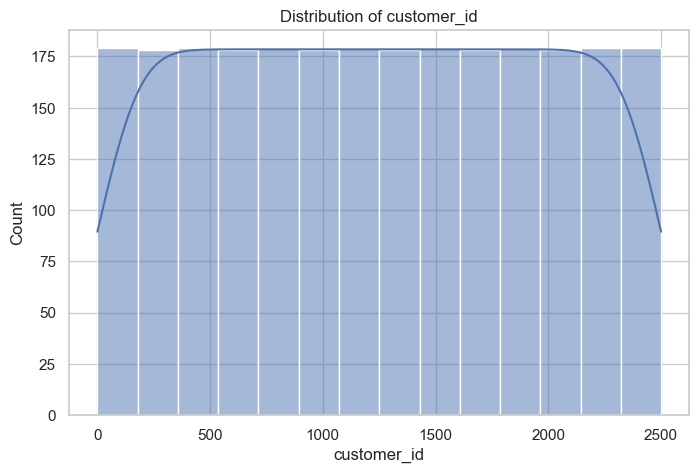

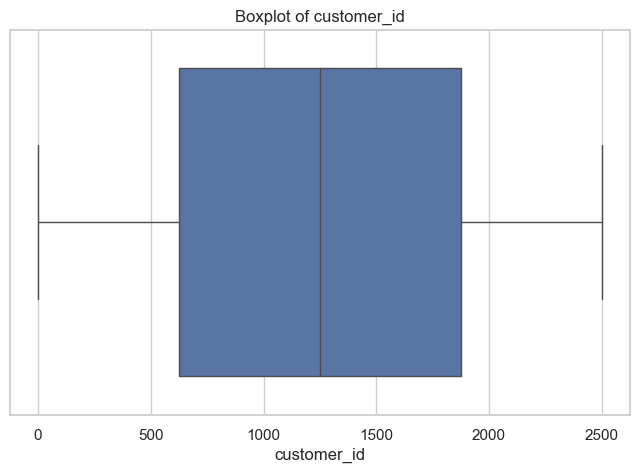

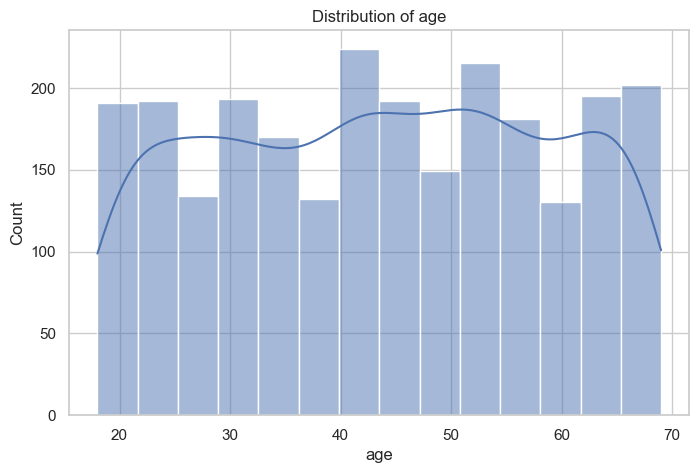

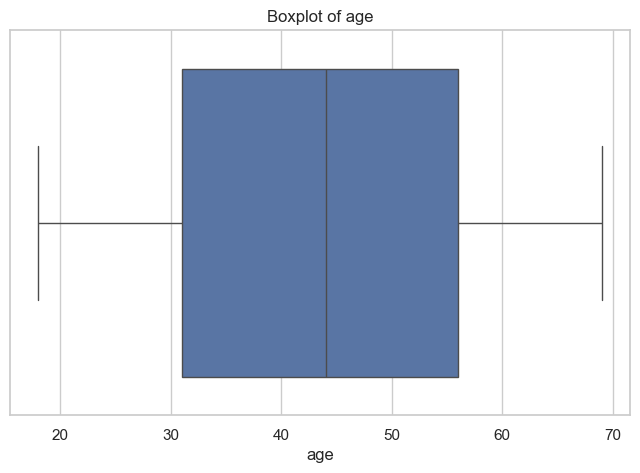

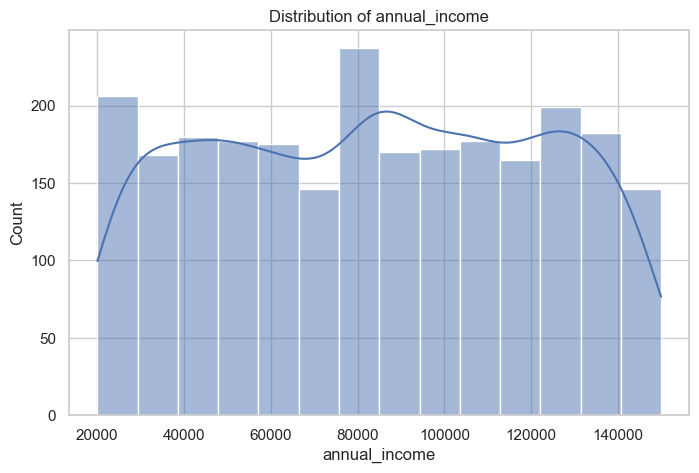

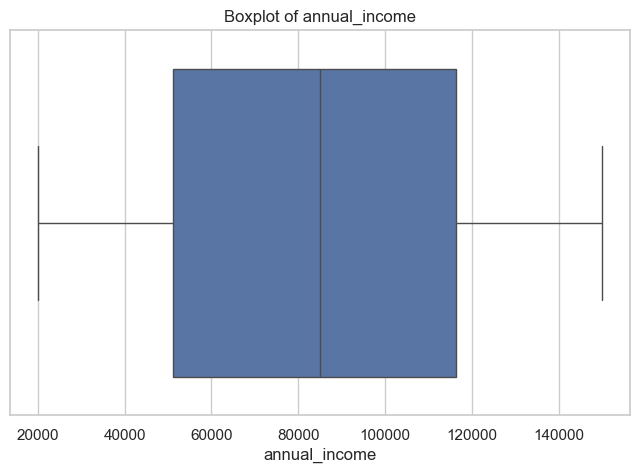

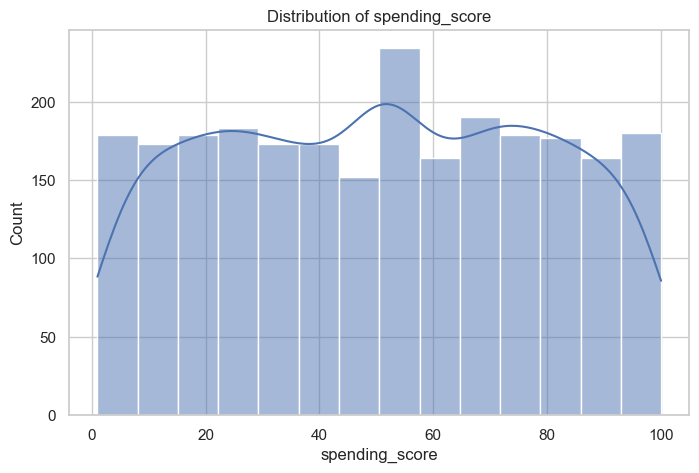

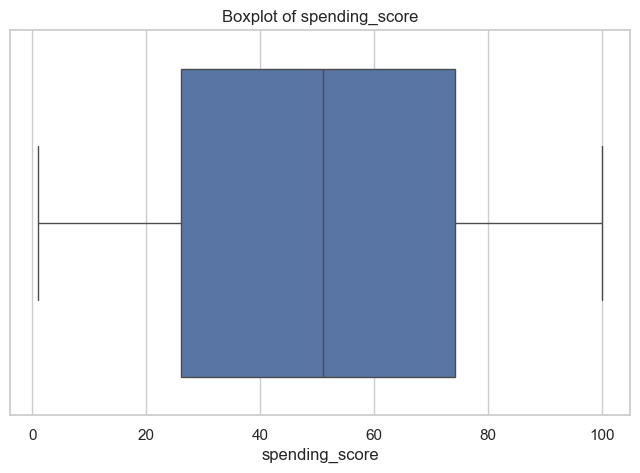

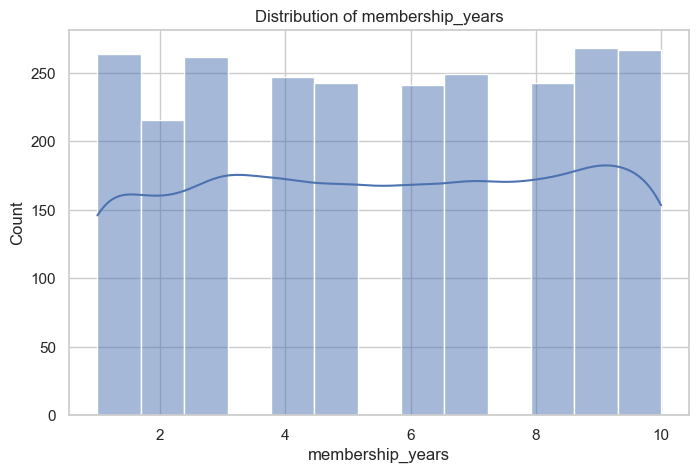

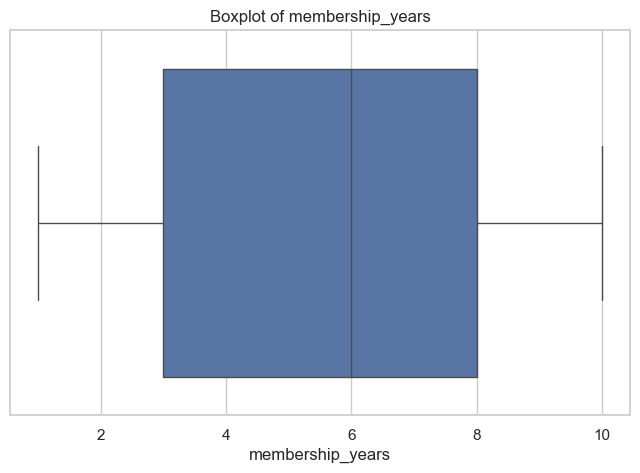

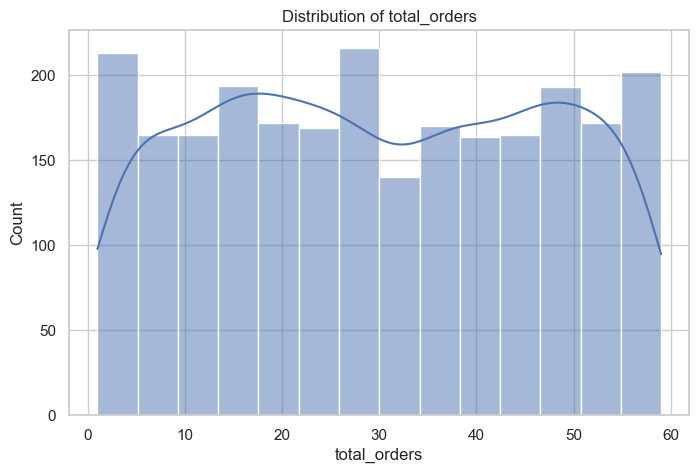

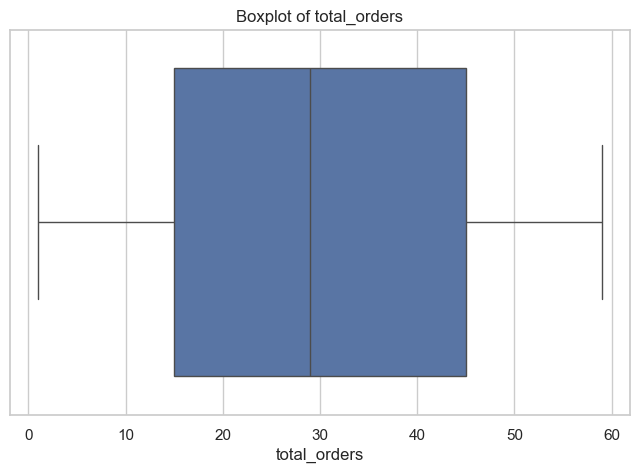

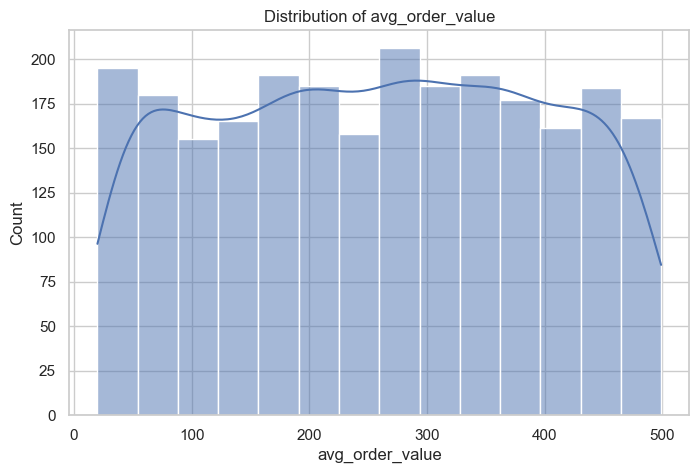

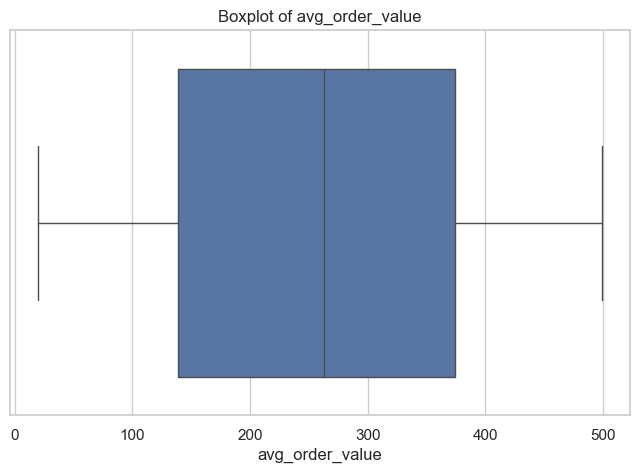

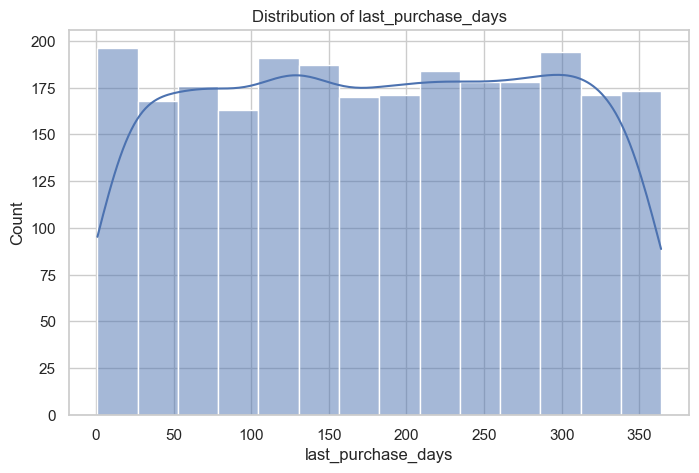

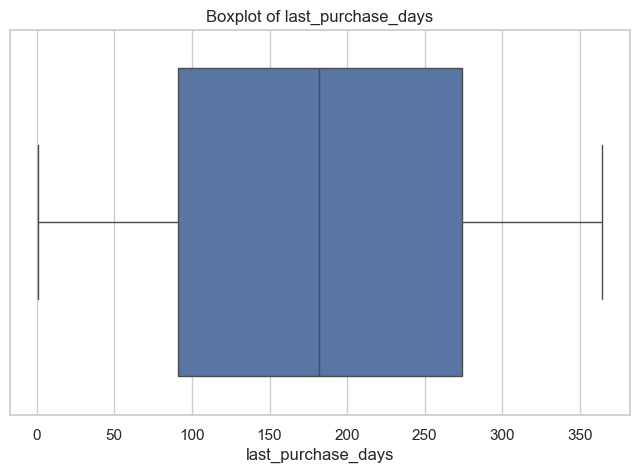

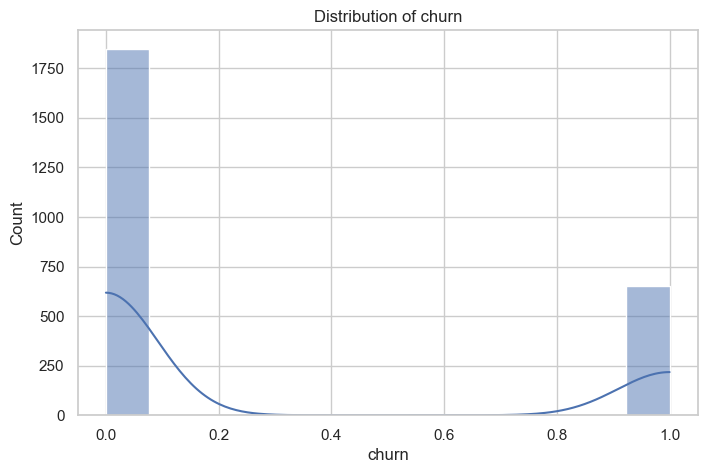

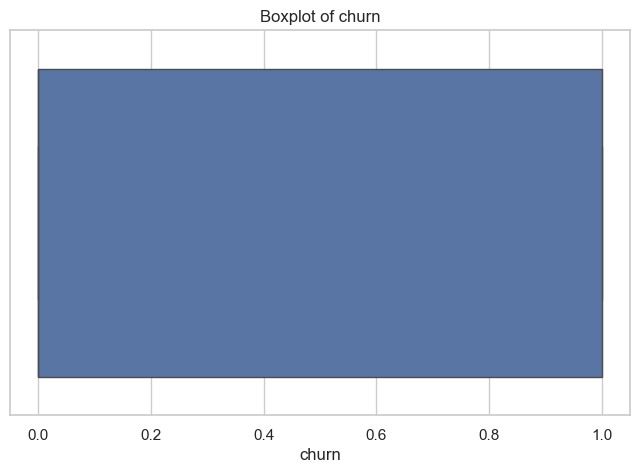

In [16]:
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

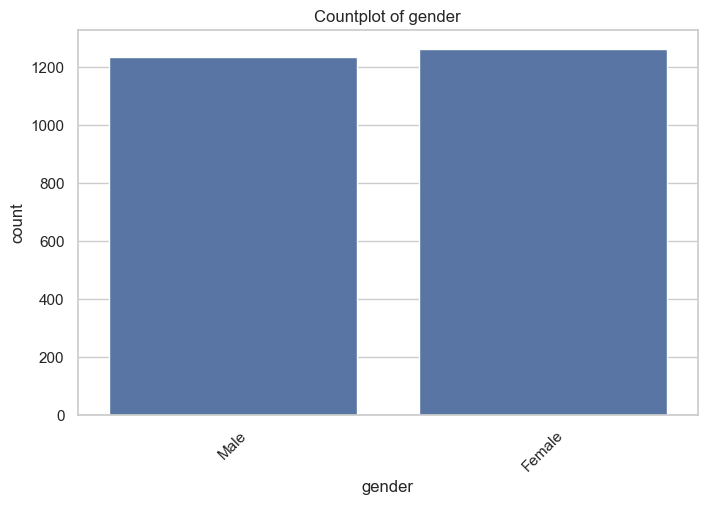

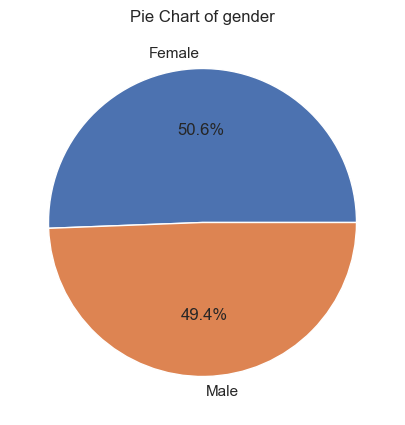

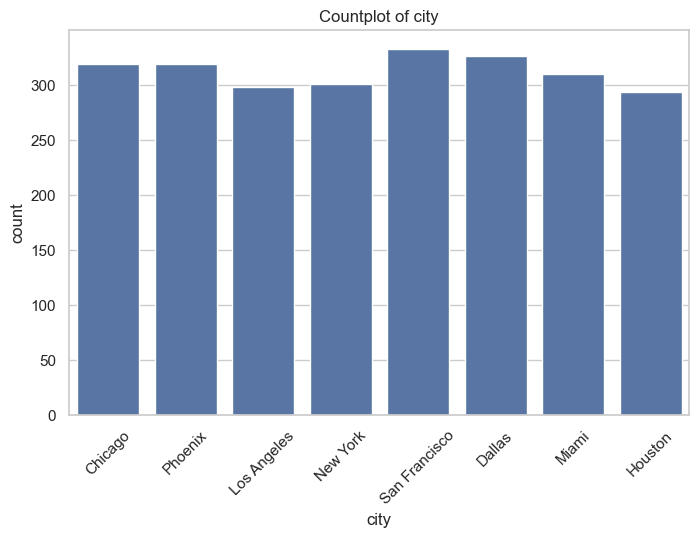

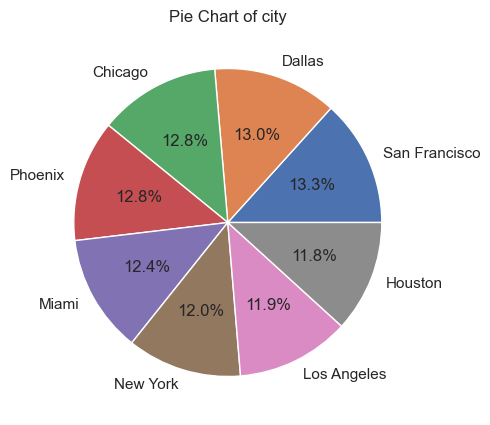

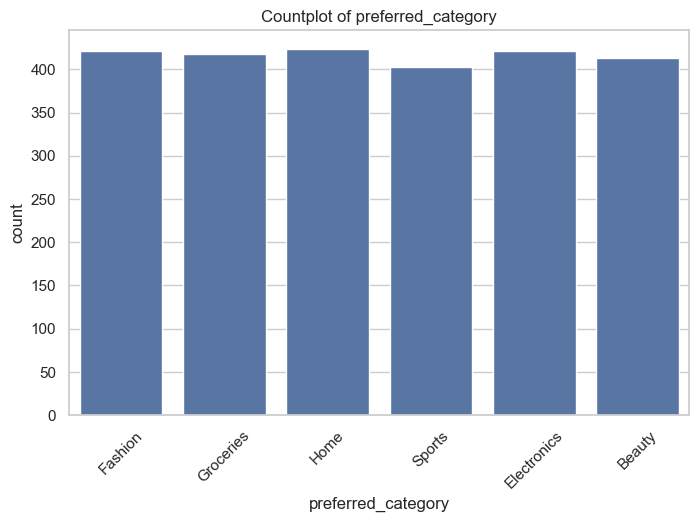

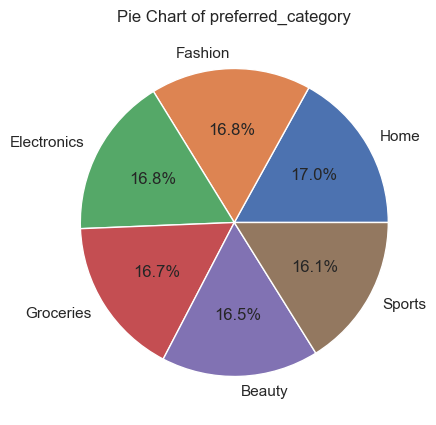

In [17]:
for col in cat_cols:
    plt.figure()
    sns.countplot(x=df[col])
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

    # Pie chart
    df[col].value_counts().plot(kind="pie", autopct="%1.1f%%")
    plt.title(f"Pie Chart of {col}")
    plt.ylabel("")
    plt.show()

In [18]:
stats.shapiro(df["annual_income"])

ShapiroResult(statistic=0.9557610232656446, pvalue=6.69409081307e-27)

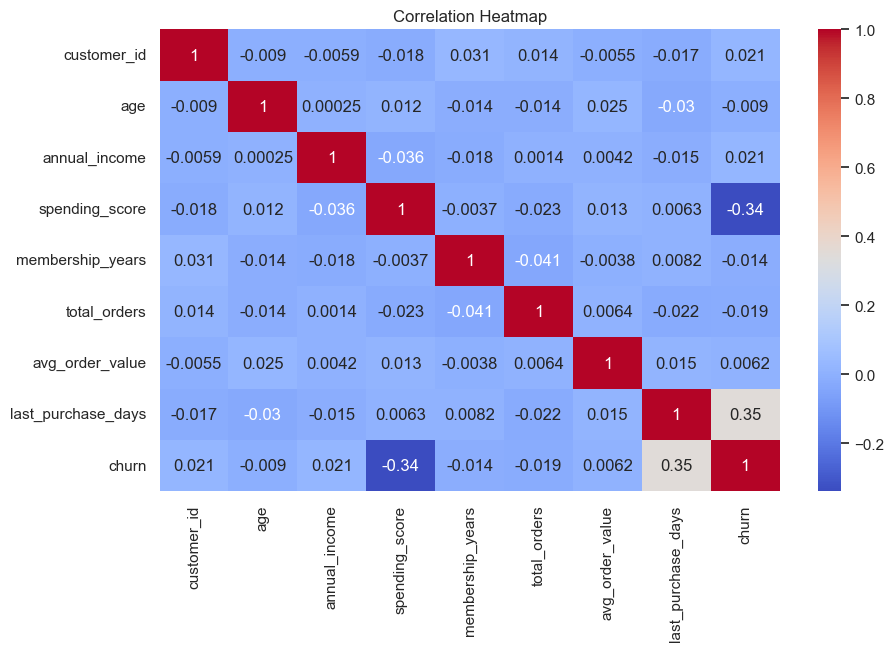

In [19]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

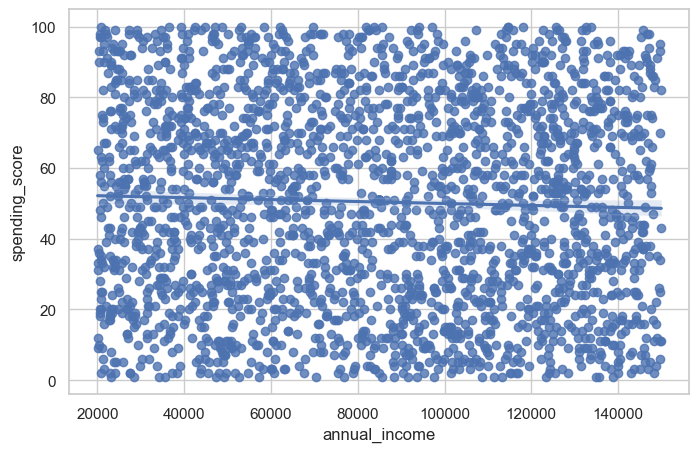

In [20]:
# Income vs Spending
sns.regplot(x="annual_income", y="spending_score", data=df)
plt.show()


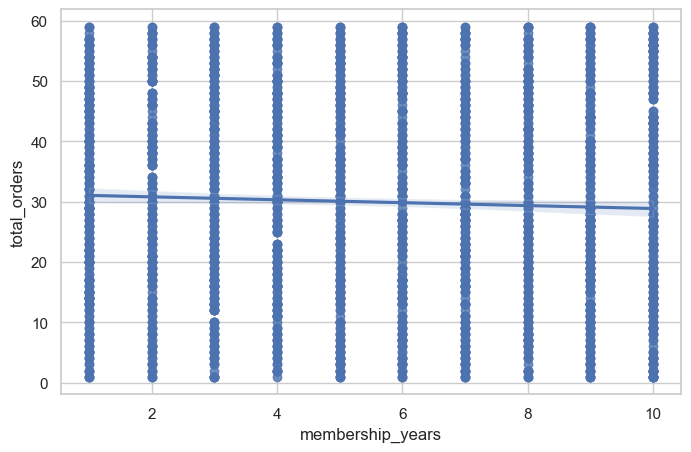

In [21]:
# Membership vs Orders
sns.regplot(x="membership_years", y="total_orders", data=df)
plt.show()

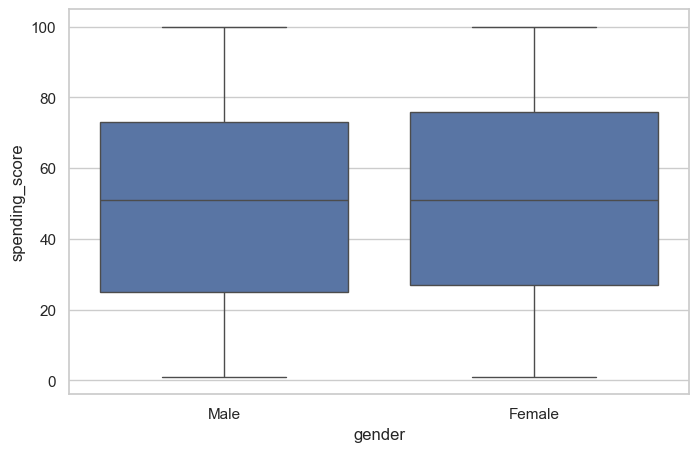

In [22]:
# Gender vs Spending
sns.boxplot(x="gender", y="spending_score", data=df)
plt.show()


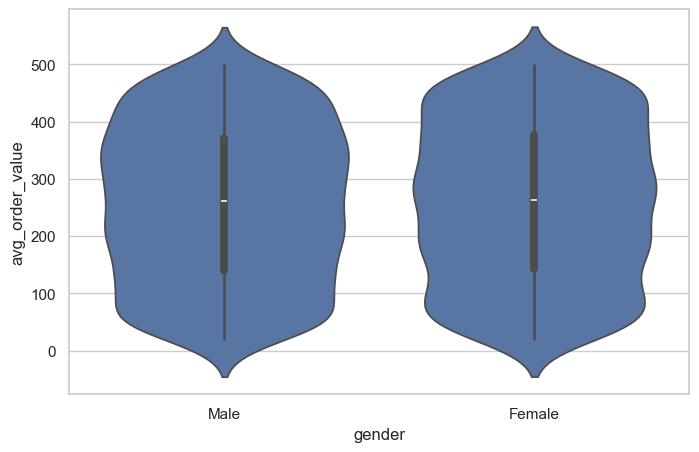

In [23]:
sns.violinplot(x="gender", y="avg_order_value", data=df)
plt.show()

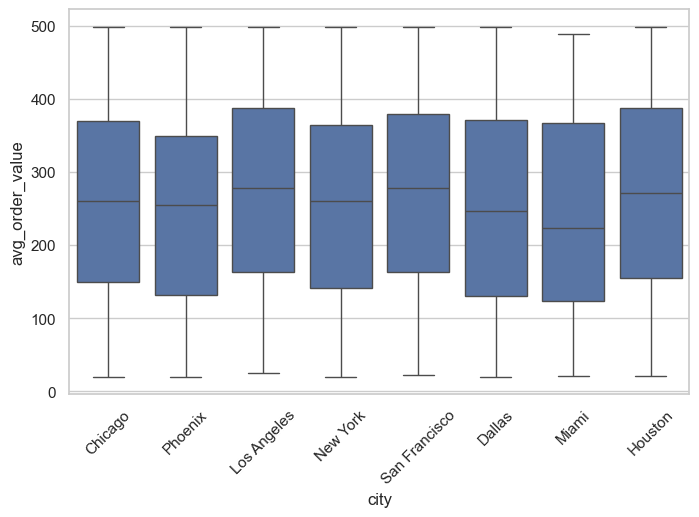

In [24]:
# City vs Avg Order Value
sns.boxplot(x="city", y="avg_order_value", data=df)
plt.xticks(rotation=45)
plt.show()

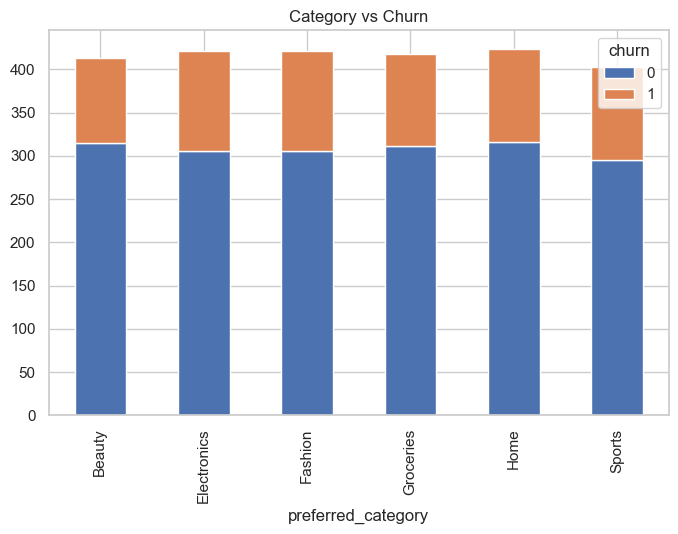

In [25]:
ct = pd.crosstab(df["preferred_category"], df["churn"])
ct

ct.plot(kind="bar", stacked=True)
plt.title("Category vs Churn")
plt.show()

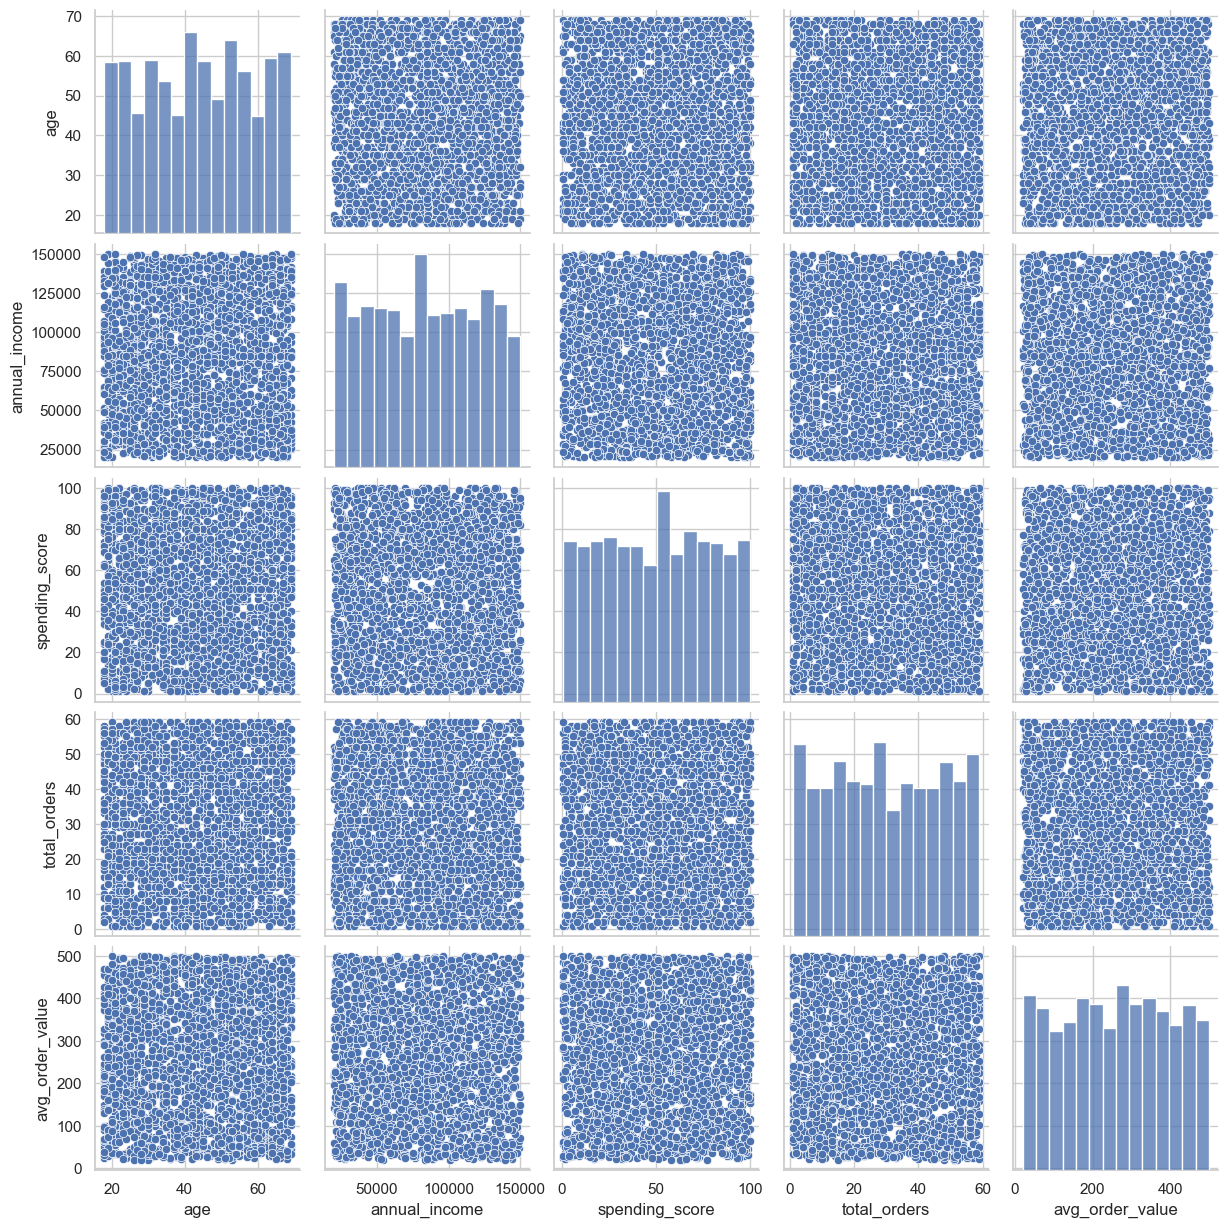

In [26]:
# Pairplot
sns.pairplot(df[["age","annual_income","spending_score",
                 "total_orders","avg_order_value"]])
plt.show()

In [27]:
# Pivot Table
pivot = pd.pivot_table(df,
                       values="avg_order_value",
                       index="city",
                       columns="gender",
                       aggfunc="mean")
pivot

gender,Female,Male
city,,
Chicago,263.023529,257.087248
Dallas,258.273292,247.496970
Houston,265.316129,266.115108
Los Angeles,279.431507,263.572368
Miami,242.627778,240.115385
New York,265.470968,244.623288
Phoenix,238.139860,259.505682
San Francisco,266.309677,274.415730


In [28]:
# Groupby Multiple Columns
df.groupby(["city","preferred_category"])["avg_order_value"].mean()

city           preferred_category
Chicago        Beauty                233.312500
               Electronics           281.283019
               Fashion               248.903846
               Groceries             266.500000
               Home                  265.951613
               Sports                262.148148
Dallas         Beauty                247.369231
               Electronics           235.470588
               Fashion               245.161765
               Groceries             250.781818
               Home                  286.630435
               Sports                260.536585
Houston        Beauty                242.104167
               Electronics           240.533333
               Fashion               270.948718
               Groceries             253.209302
               Home                  300.566038
               Sports                287.764706
Los Angeles    Beauty                293.611111
               Electronics           264.711111
      

In [29]:
# First create CLV
df["clv"] = df["total_orders"] * df["avg_order_value"]

Q1 = df["clv"].quantile(0.25)
Q3 = df["clv"].quantile(0.75)
IQR = Q3 - Q1

high_value_extreme = df[df["clv"] > Q3 + 1.5*IQR]
print("Extreme High Value Customers:", high_value_extreme.shape[0])

Extreme High Value Customers: 25


In [30]:
df["clv_z"] = zscore(df["clv"])
df[np.abs(df["clv_z"]) > 3]

,customer_id,age,gender,city,annual_income,spending_score,membership_years,total_orders,avg_order_value,last_purchase_days,preferred_category,churn,age_group,clv,clv_z
450,451,39,Male,Dallas,65875.0,49.0,8,56,487,117,Fashion,0,36-45,27272,3.012090
501,502,56,Female,Los Angeles,44495.0,15.0,3,56,493,246,Sports,0,46-60,27608,3.063922
1064,1065,41,Female,Dallas,84926.0,51.0,5,57,495,148,Home,0,36-45,28215,3.157558
1068,1069,37,Male,Houston,117462.0,5.0,10,58,499,51,Electronics,0,36-45,28942,3.269706
1248,1249,28,Female,Dallas,111717.0,95.0,1,59,499,183,Groceries,0,26-35,29441,3.346682
1282,1283,68,Male,Phoenix,112661.0,94.0,7,55,497,173,Electronics,0,60+,27335,3.021808
1646,1647,52,Female,Los Angeles,108095.0,42.0,2,58,476,17,Fashion,0,46-60,27608,3.063922
1765,1766,59,Male,New York,50699.0,56.0,10,58,494,217,Groceries,1,46-60,28652,3.224970
1772,1773,49,Male,Dallas,58762.0,34.0,5,56,494,9,Fashion,0,46-60,27664,3.072560
2190,2191,43,Male,Chicago,37143.0,80.0,7,57,490,77,Sports,0,36-45,27930,3.113594


In [31]:
# Order Frequency
df["order_frequency"] = df["total_orders"] / df["membership_years"]


In [32]:
# Income Group
df["income_group"] = pd.qcut(df["annual_income"],
                             3,
                             labels=["Low","Medium","High"])

# Recency Score
df["recency_score"] = pd.qcut(df["last_purchase_days"],
                              3,
                              labels=[3,2,1])

# Monetary Segment
df["monetary_segment"] = pd.qcut(df["clv"],
                                 4,
                                 labels=["Low","Medium","High","VIP"])

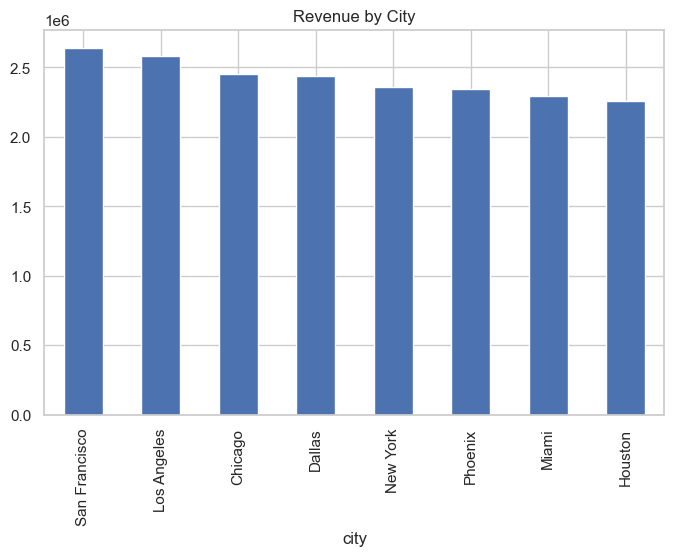

In [33]:
city_revenue = df.groupby("city")["clv"].sum().sort_values(ascending=False)
city_revenue.plot(kind="bar")
plt.title("Revenue by City")
plt.show()

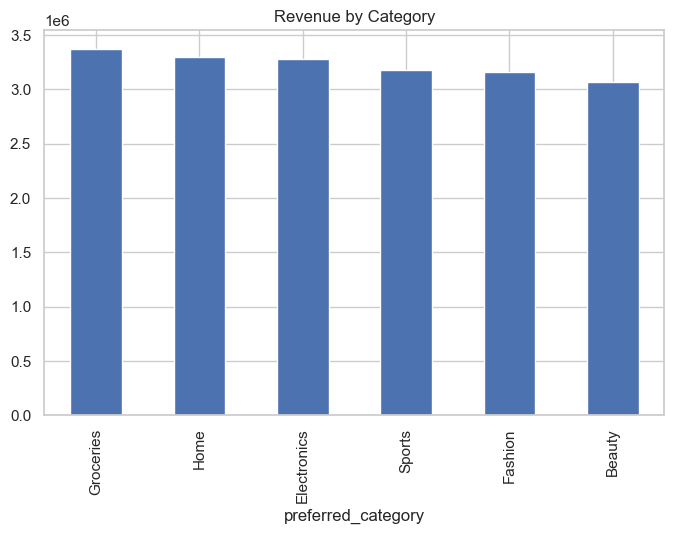

In [34]:
category_revenue = df.groupby("preferred_category")["clv"].sum().sort_values(ascending=False)
category_revenue.plot(kind="bar")
plt.title("Revenue by Category")
plt.show()

C:\Users\gsrav\AppData\Local\Temp\ipykernel_13968\3013788763.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("monetary_segment")["clv"].sum().plot(kind="bar")


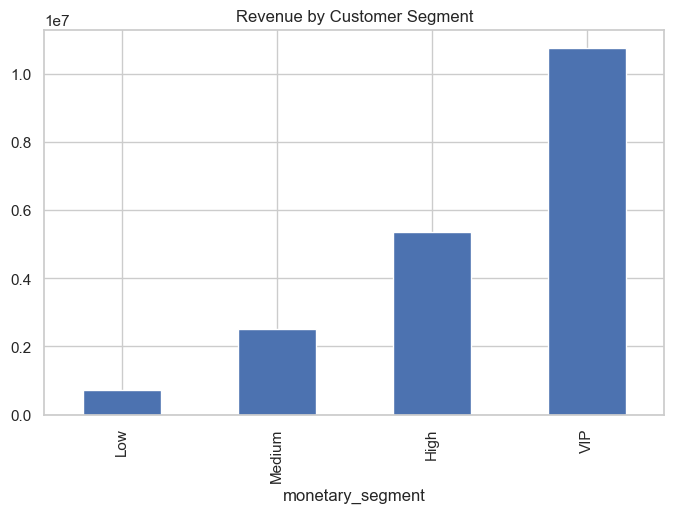

In [35]:
df.groupby("monetary_segment")["clv"].sum().plot(kind="bar")
plt.title("Revenue by Customer Segment")
plt.show()

In [36]:
df.sort_values("clv", ascending=False).head(10)

,customer_id,age,gender,city,annual_income,spending_score,membership_years,total_orders,avg_order_value,last_purchase_days,preferred_category,churn,age_group,clv,clv_z,order_frequency,income_group,recency_score,monetary_segment
1248,1249,28,Female,Dallas,111717.0,95.0,1,59,499,183,Groceries,0,26-35,29441,3.346682,59.000000,High,2,VIP
1068,1069,37,Male,Houston,117462.0,5.0,10,58,499,51,Electronics,0,36-45,28942,3.269706,5.800000,High,3,VIP
1765,1766,59,Male,New York,50699.0,56.0,10,58,494,217,Groceries,1,46-60,28652,3.224970,5.800000,Low,2,VIP
1064,1065,41,Female,Dallas,84926.0,51.0,5,57,495,148,Home,0,36-45,28215,3.157558,11.400000,Medium,2,VIP
2190,2191,43,Male,Chicago,37143.0,80.0,7,57,490,77,Sports,0,36-45,27930,3.113594,8.142857,Low,3,VIP
1772,1773,49,Male,Dallas,58762.0,34.0,5,56,494,9,Fashion,0,46-60,27664,3.072560,11.200000,Low,3,VIP
501,502,56,Female,Los Angeles,44495.0,15.0,3,56,493,246,Sports,0,46-60,27608,3.063922,18.666667,Low,1,VIP
1646,1647,52,Female,Los Angeles,108095.0,42.0,2,58,476,17,Fashion,0,46-60,27608,3.063922,29.000000,High,3,VIP
1282,1283,68,Male,Phoenix,112661.0,94.0,7,55,497,173,Electronics,0,60+,27335,3.021808,7.857143,High,2,VIP
450,451,39,Male,Dallas,65875.0,49.0,8,56,487,117,Fashion,0,36-45,27272,3.012090,7.000000,Medium,3,VIP


In [37]:
rfm = df.groupby("customer_id").agg({
    "last_purchase_days":"min",
    "total_orders":"sum",
    "clv":"sum"
})

rfm.columns = ["Recency","Frequency","Monetary"]
rfm.head()

,Recency,Frequency,Monetary
customer_id,,,
1,136,16,1936
2,247,29,8178
3,248,23,6670
4,331,24,5832
5,198,34,5372


In [38]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [39]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded.select_dtypes(include=np.number))

In [40]:
corr_matrix = df_encoded.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df_final = df_encoded.drop(columns=to_drop)

In [47]:
#Highest Revenue City
city_revenue.idxmax()

'San Francisco'

In [45]:
#Does Income Affect Spending
df["annual_income"].corr(df["spending_score"])

-0.036335988678629215

In [46]:
#Most Profitable Category
category_revenue.idxmax()

'Groceries'